<a href="https://colab.research.google.com/github/TranThiDieuHien/DO_AN_1/blob/main/DOAN_Hotel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#import thư viện
import numpy as np
import pandas as pd
import re
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
from scipy.stats import chi2_contingency
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 50
plt.rcParams.update({'font.size': 18})

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


HOTEL INFORMATION

In [4]:
#doc file
data = pd.read_csv("ThuaThienHue_Infor.csv")


In [ ]:
data.sample(2)

In [5]:
#Thong ke co ban cac du lieu cua tap du
data["HRNumber"] = pd.to_numeric(data["HRNumber"], errors='coerce')
data["HRoom"] = pd.to_numeric(data["HRoom"], errors='coerce')

In [ ]:
data.describe()

In [7]:
HAttractions = data["HAttractions"]
HGFW = data["HGFW"]
HImages = data["HImages"]
HRImages = data["HRImages"]
HRNumber = data["HRNumber"]
HRankreview = data["HRankreview"]
HRating = data["HRating"]
HRestaurants = data["HRestaurants"]
HRoom = data["HRoom"]
HVideos = data["HVideos"]

In [ ]:
import statistics as sta
#Tính mode
print(sta.mode(HGFW))
print(sta.mode(HAttractions))
print(sta.mode(HImages))
print(sta.mode(HRImages))
print(sta.mode(HRNumber))
print(sta.mode(HRankreview))
print(sta.mode(HRating))
print(sta.mode(HRestaurants))
print(sta.mode(HRoom))
print(sta.mode(HVideos))

In [ ]:
#Tính median
print(sta.median(HGFW))
print(sta.median(HAttractions))
print(sta.median(HImages))
print(sta.median(HRImages))
print(sta.median(HRNumber))
print(sta.median(HRankreview))
print(sta.median(HRating))
print(sta.median(HRestaurants))
print(sta.median(HRoom))
print(sta.median(HVideos))

In [ ]:
#Tính số dữ liệu trống (null)
data.isna().sum()

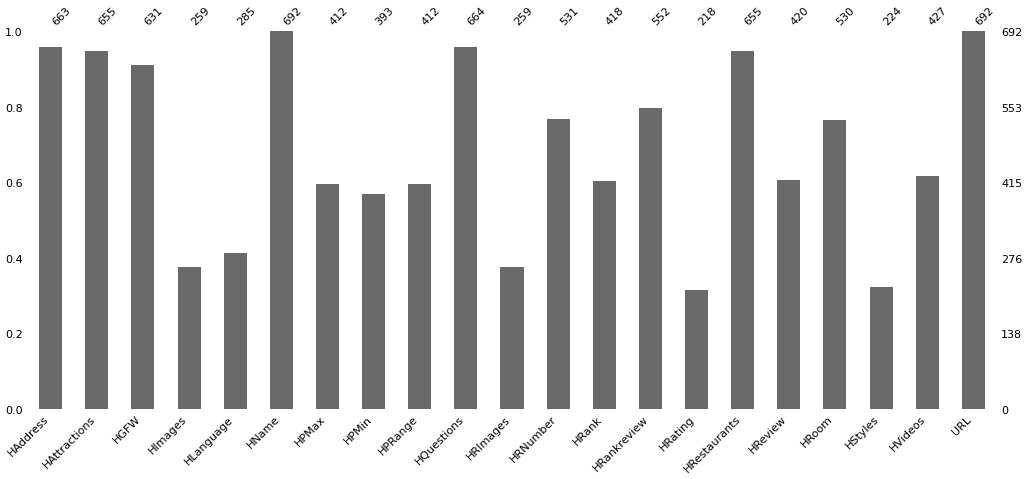

In [12]:
import missingno as msno
msno.bar(data)

HOTEL REVIEW COMMENTS

In [ ]:
#doc file
data_comment = pd.read_csv("ThuaThienHue.csv")

In [ ]:
data_comment.sample(4)

In [ ]:
#Xem thong tin cua dataframe
data_comment.info()

In [ ]:
#Dem so phan tram tung xep loai tu 1-5 sao
data_comment["HTravelerRating"].value_counts(normalize = True)

In [ ]:
#Tao cot thang luu tru tu cot ngay luu tru
data_comment["Month of stay"] = data_comment["HDate"].apply(lambda x: "".join(re.findall(r'(Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)', str(x))))
data_comment

In [ ]:
# Dem so chu
data_comment["Word_count"] = data_comment["HComment"].apply(lambda x: len(str(x).split()))
data_comment.head()

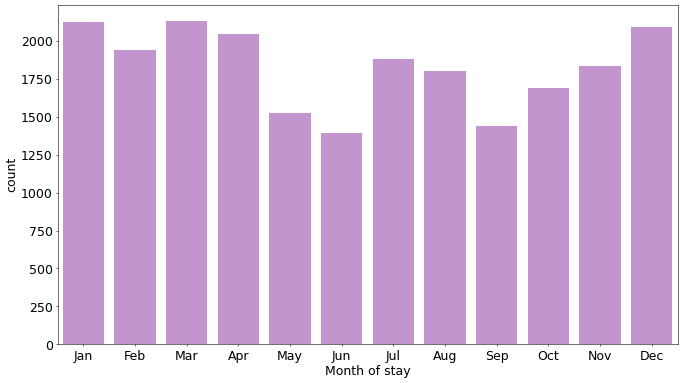

In [ ]:
month =['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.despine()
sns.countplot(x="Month of stay", data=data_comment, order=month, color='#C88BD9');

REVIEW HOTEL COMMENTS VIETNAMESE

In [ ]:
#doc file
data_comment_viet = pd.read_csv("ThuaThienHue_cmt_Viet.csv")

In [ ]:
#Dem so phan tram tung xep loai tu 1-5 sao
data_comment_viet["HTravelerRating"].value_counts(normalize = True)

5.0    0.701970
4.0    0.155524
3.0    0.066854
1.0    0.049613
2.0    0.026038
Name: HTravelerRating, dtype: float64

In [ ]:
#Tao cot thang luu tru tu cot ngay luu tru

#####Đang lỗi
data_comment_viet["Month of stay"] = data_comment_viet["HDate"].apply(lambda x: "".join(re.findall(r'(Tháng 1|Tháng 2|Tháng 3|Tháng 4|Tháng 5/|Tháng 6|Tháng 7|Tháng 8|Tháng 9|Tháng 10|Tháng 11|Tháng 12)', str(x))))
data_comment_viet.sample(5)

####Đang lỗi

In [ ]:
data_comment_viet["Year of stay"] = data_comment_viet["HDate"].apply(lambda x: "".join(re.findall("\d\d\d\d", str(x))))
data_comment_viet

In [ ]:
data_comment_viet["Year of stay"].unique()

array(['', '2018', '2017', '2022', '2020', '2016', '2014', '2019', '2015',
       '2021', '2013'], dtype=object)

In [ ]:
# Dem so chu
data_comment_viet["Word_count"] = data_comment_viet["HComment"].apply(lambda x: len(str(x).split()))
data_comment_viet.head()

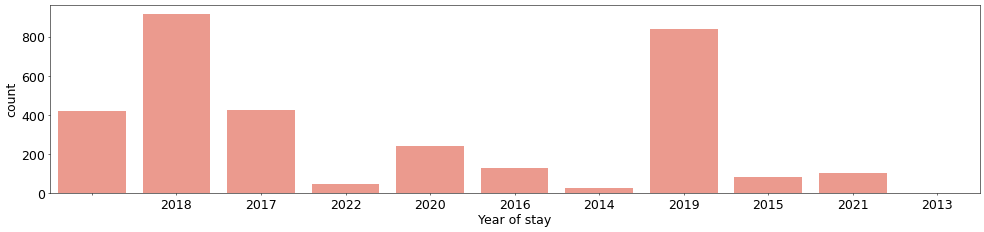

In [ ]:
# Plotting number of reviews for each year
plt.figure(figsize = (24, 5))
years = ['', '2018', '2017', '2022', '2020', '2016', '2014', '2019', '2015',
       '2021', '2013']
sns.despine()
sns.countplot(x="Year of stay", data=data_comment_viet, order=years, color='#FB8E7E');